In [22]:
%pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 676.1 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_iris()
X = data.data
y_true = data.target
X_scaled = X

In [2]:
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, davies_bouldin_score

distance_metrics = ['euclidean', 'manhattan', 'cosine']
results = {}
labels_d = {}
kmeans_d = {}

for metric in distance_metrics:
    kmedoids = KMedoids(n_clusters=3, metric=metric, random_state=42)
    kmedoids.fit(X_scaled)
    labels = kmedoids.labels_
    
    silhouette = silhouette_score(X_scaled, labels, metric=metric)
    db_score = davies_bouldin_score(X_scaled, labels)

    labels_d[metric] = labels
    kmeans_d[metric] = kmedoids
    
    results[metric] = {
        'Silhouette Score': silhouette,
        'Davies-Bouldin Score': db_score
    }

Results for Euclidean Distance:
Silhouette Score: 0.5202
Davies-Bouldin Score: 0.6686

Results for Manhattan Distance:
Silhouette Score: 0.5296
Davies-Bouldin Score: 0.6762

Results for Cosine Distance:
Silhouette Score: 0.7471
Davies-Bouldin Score: 0.7775



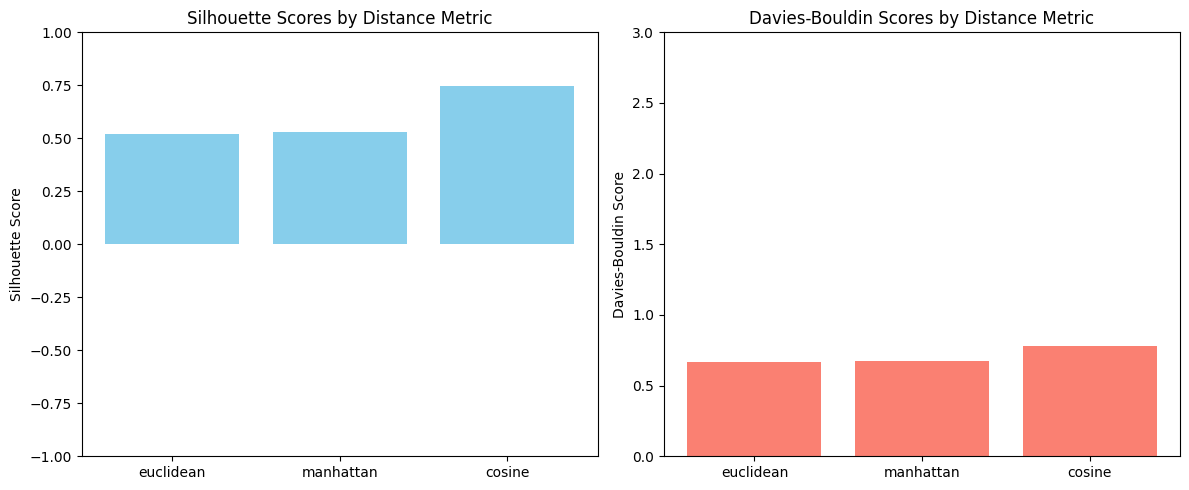

In [3]:
import matplotlib.pyplot as plt

metrics = list(results.keys())
silhouette_scores = [results[metric]['Silhouette Score'] for metric in metrics]
db_scores = [results[metric]['Davies-Bouldin Score'] for metric in metrics]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(metrics, silhouette_scores, color='skyblue')
axes[0].set_title('Silhouette Scores by Distance Metric')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_ylim(-1, 1)

# Plot Davies-Bouldin Scores
axes[1].bar(metrics, db_scores, color='salmon')
axes[1].set_title('Davies-Bouldin Scores by Distance Metric')
axes[1].set_ylabel('Davies-Bouldin Score')
axes[1].set_ylim(0, 3)  # Adjust based on expected score ranges
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, davies_bouldin_score
distance_metrics = ['euclidean', 'manhattan', 'cosine']
results = {}
labels_d = {}

for metric in distance_metrics:
    kmedoids = KMedoids(n_clusters=3, metric=metric, random_state=42)
    kmedoids.fit(X)
    labels = kmedoids.labels_
    
    # Calculate evaluation scores
    silhouette = silhouette_score(X, labels, metric=metric)
    db_score = davies_bouldin_score(X, labels)

    labels_d[metric] = labels
    
    # Store results
    results[metric] = {
        'Silhouette Score': silhouette,
        'Davies-Bouldin Score': db_score
    }

# Display results for each distance metric
for metric, scores in results.items():
    print(f"Results for {metric.capitalize()} Distance:")
    print(f"Silhouette Score: {scores['Silhouette Score']:.4f}")
    print(f"Davies-Bouldin Score: {scores['Davies-Bouldin Score']:.4f}\n")
plt.tight_layout()
plt.show()

cluster 1 contains: 50 customers
cluster 2 contains: 64 customers
cluster 3 contains: 36 customers


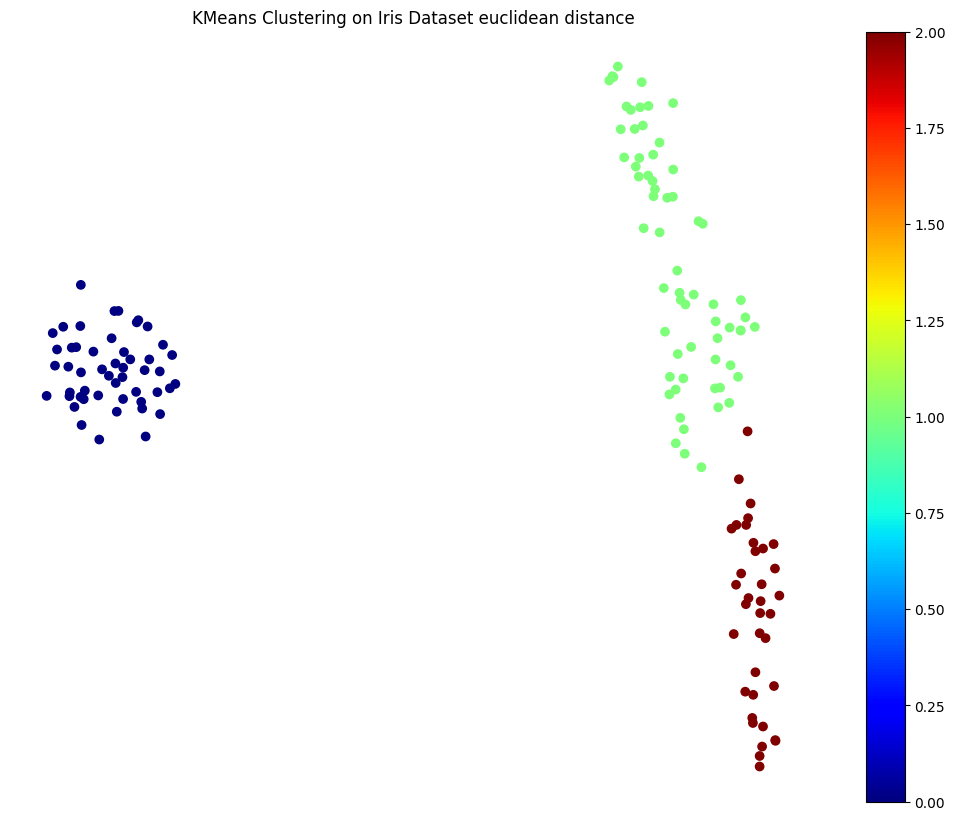

cluster 1 contains: 26 customers
cluster 2 contains: 24 customers
cluster 3 contains: 100 customers


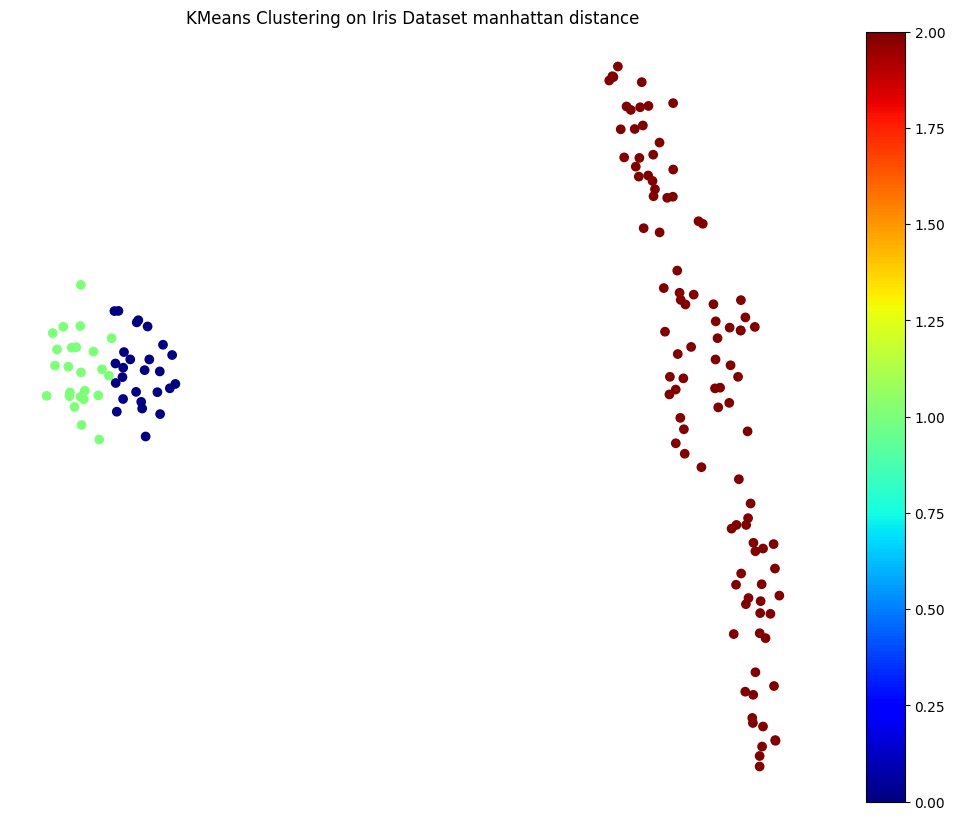

cluster 1 contains: 69 customers
cluster 2 contains: 31 customers
cluster 3 contains: 50 customers


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


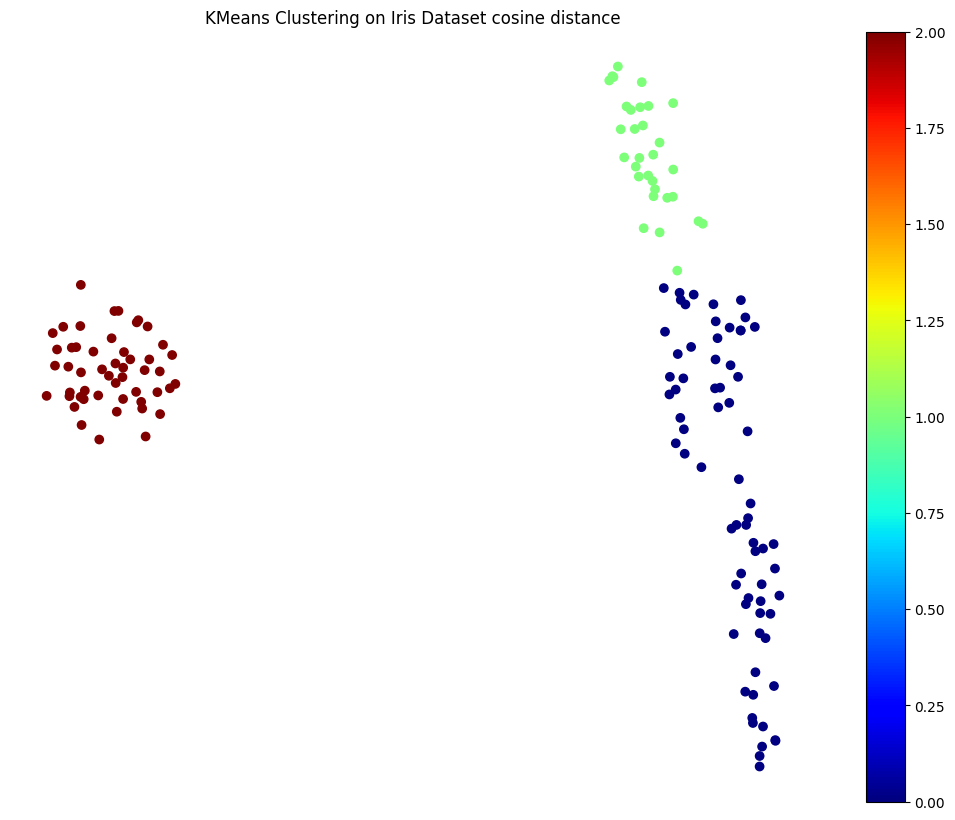

In [4]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
df_reduced = tsne.fit_transform(X_scaled)

for metric, labels in labels_d.items():
    y_pred = kmeans_d[metric].fit_predict(df_reduced)
    for i in range(3):
        print(f"cluster {i + 1} contains: {np.sum(y_pred == i)} customers")
    plt.figure(figsize=(13,10 ))
    plt.scatter(df_reduced[:, 0], df_reduced[:, 1],c=y_pred, cmap="jet")
    plt.axis('off')
    plt.colorbar()
    plt.title(f'KMeans Clustering on Iris Dataset {metric} distance')
    plt.show()

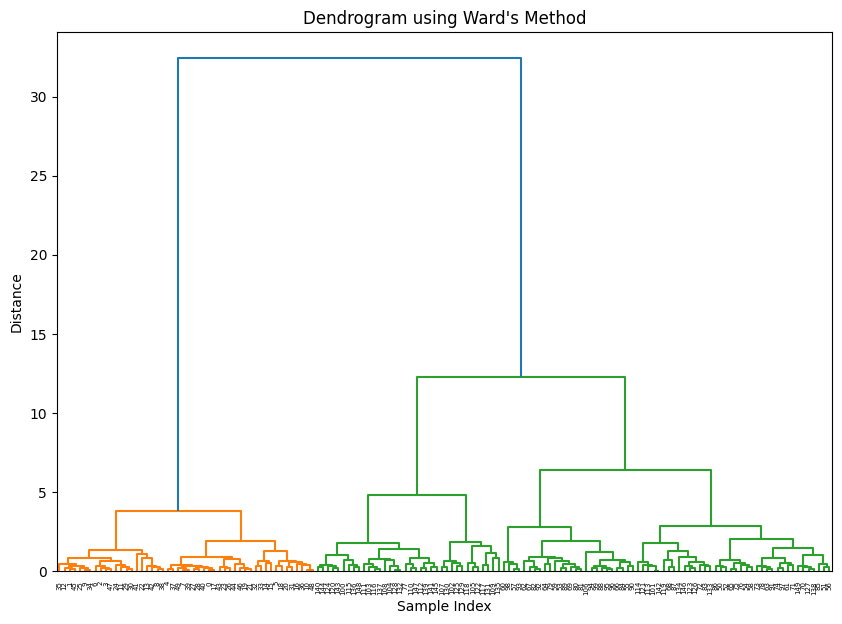

Results for Ward's Clustering:
Silhouette Score: 0.5543
Davies-Bouldin Score: 0.6563


In [5]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram using Ward\'s Method')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

clusterer = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = clusterer.fit_predict(X_scaled)

silhouette = silhouette_score(X_scaled, labels)
db_score = davies_bouldin_score(X_scaled, labels)

print("Results for Ward's Clustering:")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")


In [15]:
from sklearn.datasets import load_wine

data = load_wine()
X = data.data
y_true = data.target
X_scaled = X

In [11]:
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, davies_bouldin_score

distance_metrics = ['euclidean', 'manhattan', 'cosine']
results = {}
labels_d = {}
kmeans_d = {}

for metric in distance_metrics:
    kmedoids = KMedoids(n_clusters=3, metric=metric, random_state=42)
    kmedoids.fit(X_scaled)
    labels = kmedoids.labels_
    
    silhouette = silhouette_score(X_scaled, labels, metric=metric)
    db_score = davies_bouldin_score(X_scaled, labels)

    labels_d[metric] = labels
    kmeans_d[metric] = kmedoids
    
    results[metric] = {
        'Silhouette Score': silhouette,
        'Davies-Bouldin Score': db_score
    }

for metric, scores in results.items():
    print(f"Results for {metric.capitalize()} Distance:")
    print(f"Silhouette Score: {scores['Silhouette Score']:.4f}")
    print(f"Davies-Bouldin Score: {scores['Davies-Bouldin Score']:.4f}\n")

Results for Euclidean Distance:
Silhouette Score: 0.5666
Davies-Bouldin Score: 0.5292

Results for Manhattan Distance:
Silhouette Score: 0.5268
Davies-Bouldin Score: 0.5301

Results for Cosine Distance:
Silhouette Score: 0.6960
Davies-Bouldin Score: 0.6643



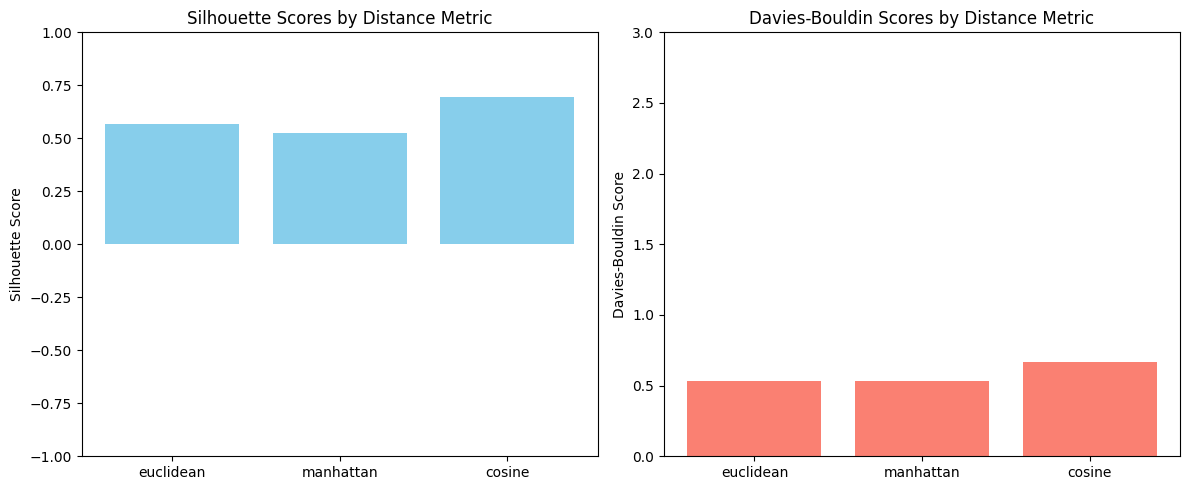

In [12]:
import matplotlib.pyplot as plt

metrics = list(results.keys())
silhouette_scores = [results[metric]['Silhouette Score'] for metric in metrics]
db_scores = [results[metric]['Davies-Bouldin Score'] for metric in metrics]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(metrics, silhouette_scores, color='skyblue')
axes[0].set_title('Silhouette Scores by Distance Metric')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_ylim(-1, 1)

# Plot Davies-Bouldin Scores
axes[1].bar(metrics, db_scores, color='salmon')
axes[1].set_title('Davies-Bouldin Scores by Distance Metric')
axes[1].set_ylabel('Davies-Bouldin Score')
axes[1].set_ylim(0, 3)  # Adjust based on expected score ranges

plt.tight_layout()
plt.show()

cluster 1 contains: 59 customers
cluster 2 contains: 57 customers
cluster 3 contains: 62 customers


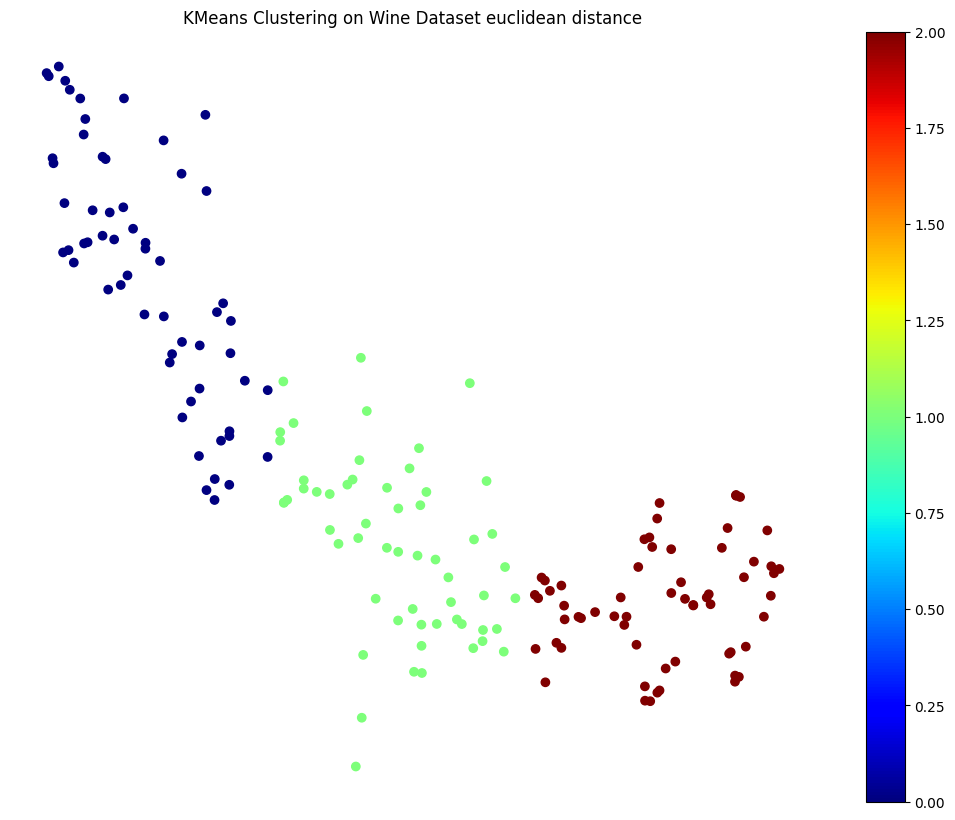

cluster 1 contains: 58 customers
cluster 2 contains: 62 customers
cluster 3 contains: 58 customers


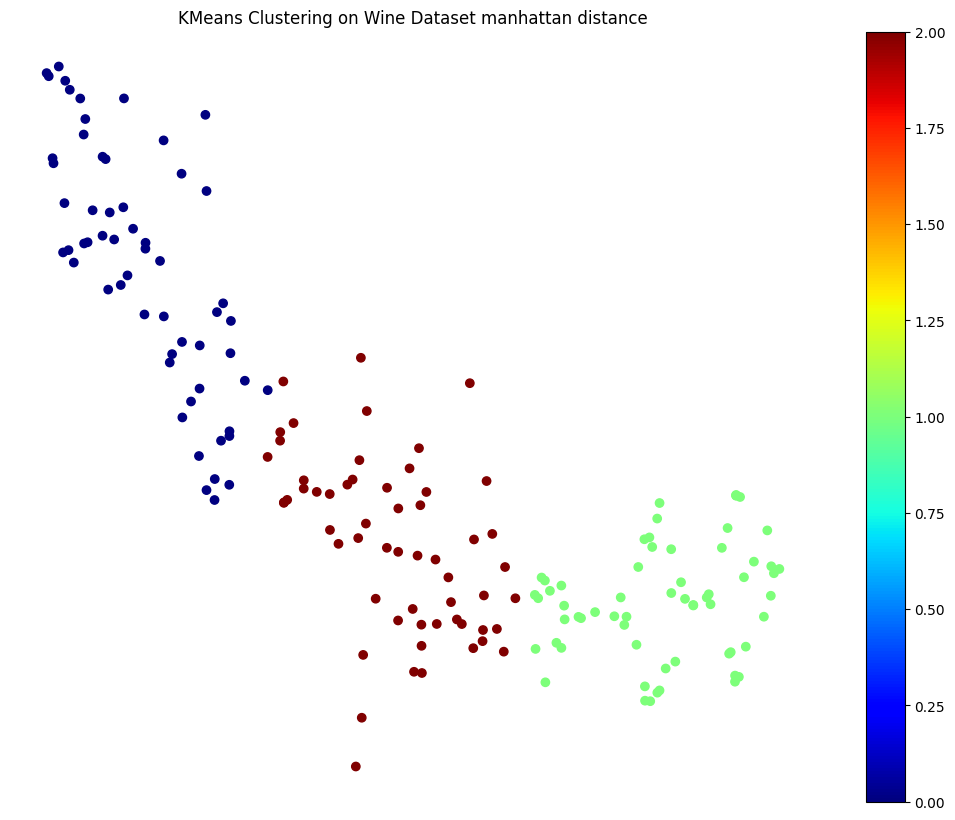

cluster 1 contains: 78 customers
cluster 2 contains: 10 customers
cluster 3 contains: 90 customers


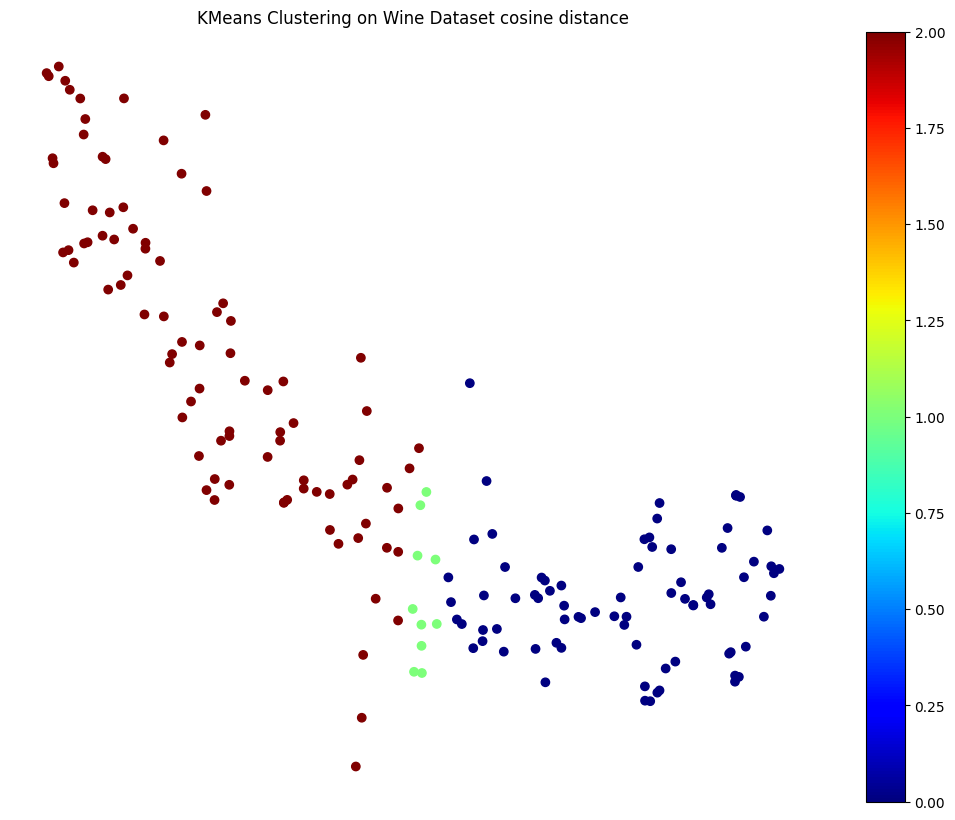

In [13]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
df_reduced = tsne.fit_transform(X_scaled)

for metric, labels in labels_d.items():
    y_pred = kmeans_d[metric].fit_predict(df_reduced)
    for i in range(3):
        print(f"cluster {i + 1} contains: {np.sum(y_pred == i)} customers")
    plt.figure(figsize=(13,10 ))
    plt.scatter(df_reduced[:, 0], df_reduced[:, 1],c=y_pred, cmap="jet")
    plt.axis('off')
    plt.colorbar()
    plt.title(f'KMeans Clustering on Wine Dataset {metric} distance')
    plt.show()

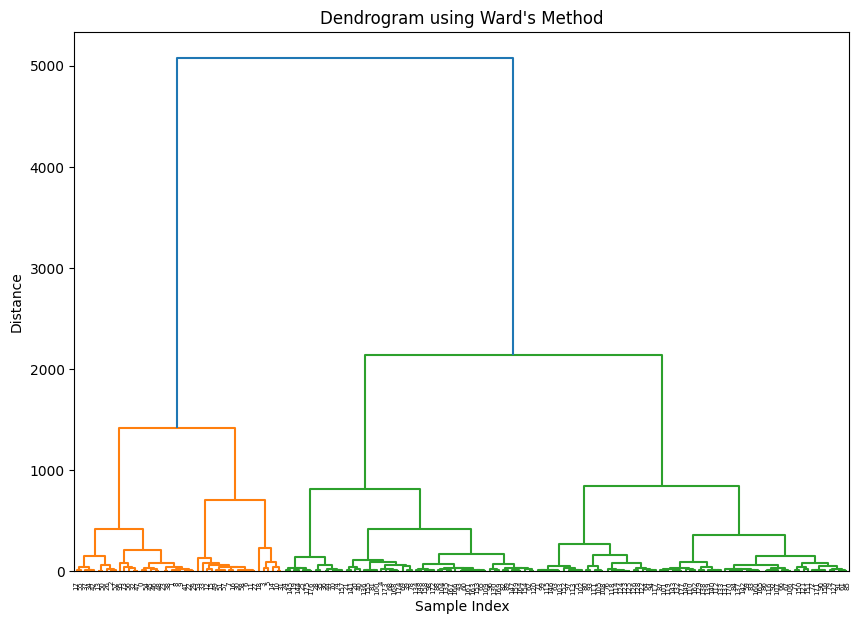

Results for Ward's Clustering:
Silhouette Score: 0.5645
Davies-Bouldin Score: 0.5357


In [14]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram using Ward\'s Method')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

clusterer = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = clusterer.fit_predict(X_scaled)

silhouette = silhouette_score(X_scaled, labels)
db_score = davies_bouldin_score(X_scaled, labels)

print("Results for Ward's Clustering:")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")
